In [1]:
%load_ext autoreload
%autoreload 2

from graphs import *
from gallagher_algorithm import *
from integer_and_scipy import *
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Network Visualization

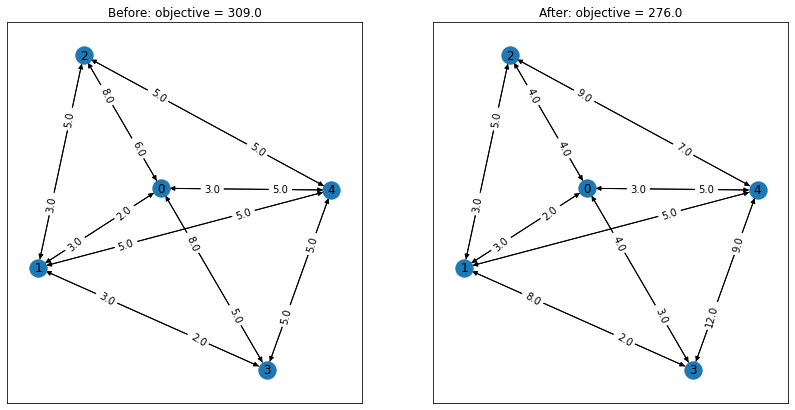

In [100]:
n = 5
seed = 12
eta = 1
np.random.seed(seed)
D = np.random.randint(1, 7, size=(n,n))
G = Network(n=n, seed=seed, D_scaling=D, p=0.7)
G.setPhi(shortestPathsPhi(G))

ax1 = plt.subplot(1, 2, 1)
G.visualize(withEdgeTraffic=True, ax=ax1)
ax1.set_title(f'Before: objective = {G.D_T()}')

iterGallagher(G, nTrials=trials, eta=eta)

ax2 = plt.subplot(1, 2, 2)
G.visualize(withEdgeTraffic=True, ax=ax2);
plt.gcf().set_size_inches(14, 7)
ax2.set_title(f'After: objective = {G.D_T()}');

## Linear Convergence Results

In [2]:
# From Params
seed = 11
n = 10
np.random.seed(seed)
D = np.random.randint(1, 7, size=(n,n))

In [31]:
etas = [0.001, 0.01, 0.1, 1]
trials = 2800

G = Network(n=n, seed=seed, D_scaling=D, p=0.7)

scores = np.zeros((len(etas), trials + 1))
for i, eta in enumerate(etas):
    G.setPhi(shortestPathsPhi(G))
    scores[i, :] = iterGallagher(G, nTrials = trials, eta=eta)

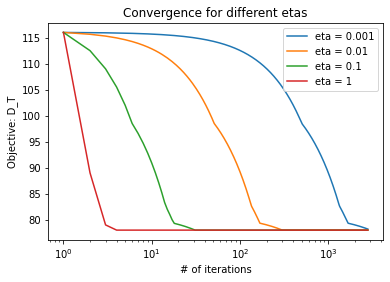

In [39]:
for i in range(len(etas)):
    plt.plot(np.arange(1, trials + 2), scores[i, :])
plt.legend([f'eta = {etas[j]}' for j in range(len(etas))], loc = 'upper right')
plt.xscale('log')
plt.xlabel('# of iterations')
plt.ylabel('Objective: D_T')
plt.title('Convergence for different etas');

In [44]:
eta = 1
ns = [5, 10, 15, 20, 25, 30]
trials = 100
scores = np.zeros((len(ns), trials + 1))
for i, n in enumerate(ns):
    D = np.random.randint(1, 7, size=(n,n))
    G = Network(n=n, seed=seed, D_scaling=D, p=0.7)
    G.setPhi(shortestPathsPhi(G))
    scores[i] = iterGallagher(G, nTrials = 100, eta=eta)

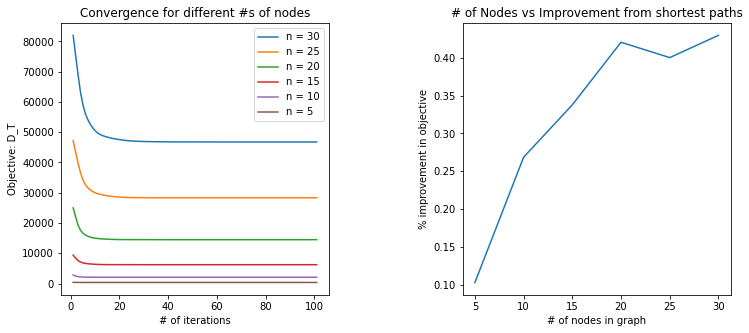

In [60]:
plt.subplot(1, 2, 1)
for i in range(len(ns)):
    plt.plot(np.arange(1, trials + 2), scores[len(ns) - 1 - i, :])
plt.legend([f'n = {ns[j]}' for j in range(len(ns) - 1, -1, -1)], loc = 'upper right')
plt.xlabel('# of iterations')
plt.ylabel('Objective: D_T')
plt.title('Convergence for different #s of nodes')


plt.subplot(1, 2, 2)
plt.plot(ns, np.ones(len(ns)) - scores[:, trials] / scores[:, 0])
plt.xlabel('# of nodes in graph')
plt.ylabel('% improvement in objective')
plt.title('# of Nodes vs Improvement from shortest paths')

plt.subplots_adjust(wspace = 0.5)
plt.gcf().set_size_inches(12, 5)

## Quadratic Convergence Results

In [85]:
n = 15
seed = 12
np.random.seed(seed)
D = np.random.randint(1, 7, size=(n,n))
D_func = lambda F: 1/2 * D * F ** 2
derivD_func = lambda F: D * F
G = Network(n=n, seed=seed, D_scaling=D, p=0.7, D_func = D_func, derivD_func=derivD_func)

etas = [0.01, 0.1, 1]
trials = 250

scores = np.zeros((len(etas), trials + 1))
for i, eta in enumerate(etas):
    G.setPhi(shortestPathsPhi(G))
    scores[i, :] = iterGallagher(G, nTrials=trials, eta=eta)

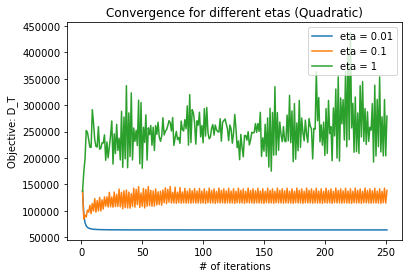

In [89]:
for i in range(len(etas)):
    plt.plot(np.arange(1, trials + 2), scores[i, :])
plt.legend([f'eta = {etas[j]}' for j in range(len(etas))], loc = 'upper right')
plt.xlabel('# of iterations')
plt.ylabel('Objective: D_T')
plt.title('Convergence for different etas (Quadratic)');